# Imports and function definitions

In [467]:
import sys
sys.path.append('../')
from importlib import reload
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import utilities.plots_metrics as pm
reload(pm)

<module 'utilities.plots_metrics' from '/home/sarssw/filip/sarssw/machine_learning/../utilities/plots_metrics.py'>

In [468]:
def scatterplot_and_heatmaps(df, name_text, unit, target_column, prediction_column, alpha=0.01):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].scatter(df[target_column], df[prediction_column], alpha=alpha)
    axs[0].plot([0, 1], [0, 1], color='black', transform=axs[0].transAxes, label='Identity line x=y') #Plot identity line
    axs[0].set_title('Scatterplot for ' + name_text)
    axs[0].set_xlabel(f"Target {name_text} [{unit}]")
    axs[0].set_ylabel(f"Predicted {name_text} [{unit}]")
    axs[0].legend()

    (h2d_h, h2d_xedg, h2d_yedg, h2d_img) = axs[1].hist2d(df[target_column], df[prediction_column], bins=100, norm=mpl.colors.LogNorm(clip=True))
    axs[1].plot([0, 1], [0, 1], color='black', transform=axs[1].transAxes, label='Identity line x=y') #Plot identity line
    axs[1].set_title('Heatmap for ' + name_text + ', log scaled colormap')
    axs[1].set_xlabel(f"Target {name_text} [{unit}]")
    axs[1].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(h2d_img, ax=axs[1], label='Count colormap')
    axs[1].legend()

    hist = h2d_h.copy().T
    with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= 1 / hist.sum(axis=0, keepdims=True)
        
    #Remove nans, to remove white columns
    hist[np.isnan(hist)] = 0

    pcm = axs[2].pcolormesh(h2d_xedg, h2d_yedg, hist, norm=mpl.colors.LogNorm(clip=True))
    axs[2].plot([0, 1], [0, 1], color='black', transform=axs[2].transAxes, label='Identity line x=y') #Plot identity line
    axs[2].set_title('Heatmap for ' + name_text + ', normalized columns, log scaled colormap')
    axs[2].set_xlabel(f"Target {name_text} [{unit}]")
    axs[2].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(pcm, ax=axs[2], label='Frequency colormap')
    axs[2].legend()

    display(fig)
    plt.close()

# Load data

In [469]:
#model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=15-val_loss=0.28.ckpt'
model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=41-val_loss=0.28.ckpt' #Best
#model_result_dir = '/data/exjobb/sarssw/result_predictions/latest-epoch-epoch=56.ckpt'

#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/best_val_loss-epoch=41-val_loss=0.31.ckpt' #Best
#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/best_val_loss-epoch=55-val_loss=0.31.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/latest-epoch-epoch=99.ckpt'

In [470]:
# Read results
with open(os.path.join(model_result_dir, 'results.txt'), 'r') as f:
    print(f.read())

Validation on the train data:
[{'val_loss': 0.18103699386119843, 'val_wave_rmse': 0.27273377776145935, 'val_wind_rmse': 1.173358678817749, 'val_wave_mae': 0.21377983689308167, 'val_wind_mae': 0.9337227940559387}]
Validation on the validation data:
[{'val_loss': 0.2686779499053955, 'val_wave_rmse': 0.4298397898674011, 'val_wind_rmse': 1.5669156312942505, 'val_wave_mae': 0.3237841725349426, 'val_wind_mae': 1.267972707748413}]
Test result on the test data:
[{'test_loss': 0.26729997992515564, 'test_wave_rmse': 0.42702803015708923, 'test_wind_rmse': 1.5650643110275269, 'test_wave_mae': 0.32315224409103394, 'test_wind_mae': 1.2554693222045898}]


In [471]:
train_result_df = pd.read_csv(os.path.join(model_result_dir, 'train_predictions.csv'))
val_result_df = pd.read_csv(os.path.join(model_result_dir, 'val_predictions.csv'))
test_result_df = pd.read_csv(os.path.join(model_result_dir, 'test_predictions.csv'))

In [472]:
# Load dataframe for features and labels
feature_labels_path = '/data/exjobb/sarssw/sar_dataset_features_labels_22_may/sar_dataset.pickle'
feature_labels = pd.read_pickle(feature_labels_path)
display(feature_labels.columns)
display(feature_labels)

Index(['sar_name', 'bouy_name', 'file_name', 'pol', 'incidence', 'safe',
       'swath', 'platform', 'orbit_pass', 'product', 'platform_heading',
       'polarisations', 'longitude', 'latitude', 'time', 'subimage_index',
       'hom_test', 'contrast', 'dissimilarity', 'homogeneity', 'energy',
       'correlation', 'ASM', 'sigma_mean', 'sigma_var', 'sigma_mean_over_var',
       'sigma_min', 'sigma_max', 'sigma_range', 'acw', 'acw_db', 'acw_median',
       'acw_median_db', 'SWH_value', 'SWH_source', 'SWH_lon', 'SWH_lat',
       'SWH_time', 'WSPD_value', 'WSPD_source', 'WSPD_lon', 'WSPD_lat',
       'WSPD_time', 'split'],
      dtype='object')

,sar_name,bouy_name,file_name,pol,incidence,safe,swath,platform,orbit_pass,product,...,SWH_source,SWH_lon,SWH_lat,SWH_time,WSPD_value,WSPD_source,WSPD_lon,WSPD_lat,WSPD_time,split
0,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.741270,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
1,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HV,28.741270,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
2,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.704935,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
3,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HV,28.704935,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
4,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.704821,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878397,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.246292,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test
878398,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297585,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test
878399,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297779,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test
878400,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297394,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test


# Train results

In [473]:
train_result_merged = train_result_df.merge(feature_labels[['file_name', 'SWH_source', 'WSPD_source']], on='file_name', how='left')
display(train_result_merged)


,Unnamed: 0,file_name,target_wave,target_wind,prediction_wave,prediction_wind,SWH_source,WSPD_source
0,0,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.530765,8.906387,bouy,bouy
1,0,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.530765,8.906387,bouy,bouy
2,1,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.619478,8.147591,bouy,bouy
3,1,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.619478,8.147591,bouy,bouy
4,2,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.476824,8.419947,bouy,bouy
...,...,...,...,...,...,...,...,...
314453,157226,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.990009,6.601922,bouy,model
314454,157227,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,3.282276,6.245115,bouy,model
314455,157227,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,3.282276,6.245115,bouy,model
314456,157228,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.956266,5.838311,bouy,model


## Wave height

Wave height evaluated on training data from both buoy and model data
{'rmse': 0.2842252790536008, 'bias': -0.04260059004546236, 'slope': 0.8422572603065597, 'data_points': 314458}


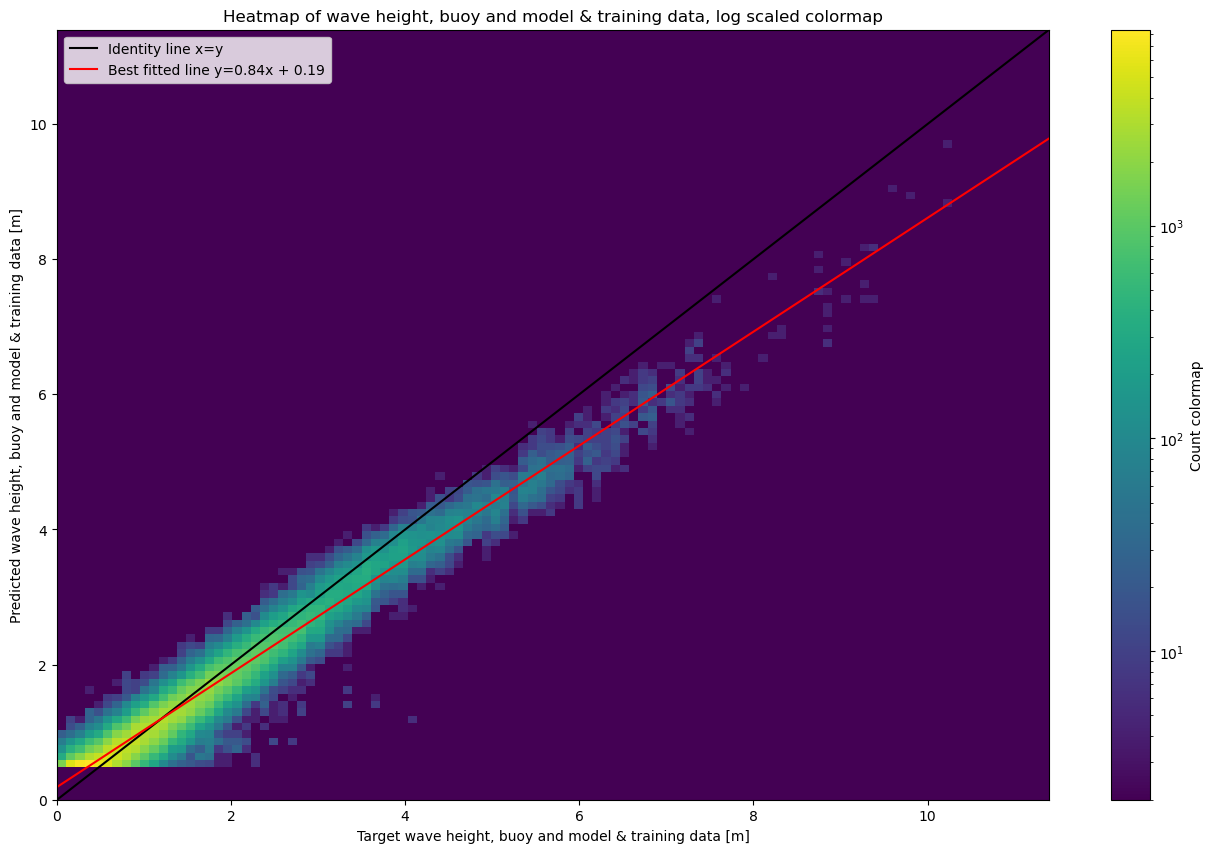

In [474]:
print("Wave height evaluated on training data from both buoy and model data")
print(pm.metrics(train_result_merged, "target_wave", "prediction_wave"))
pm.heatmap(train_result_merged, "wave height, buoy and model & training data", "m", "target_wave", "prediction_wave", best_line=True)

Wave height evaluated on training data from buoy data
{'rmse': 0.28334314166187596, 'bias': -0.042051322703418235, 'slope': 0.8417002303339097, 'data_points': 287516}


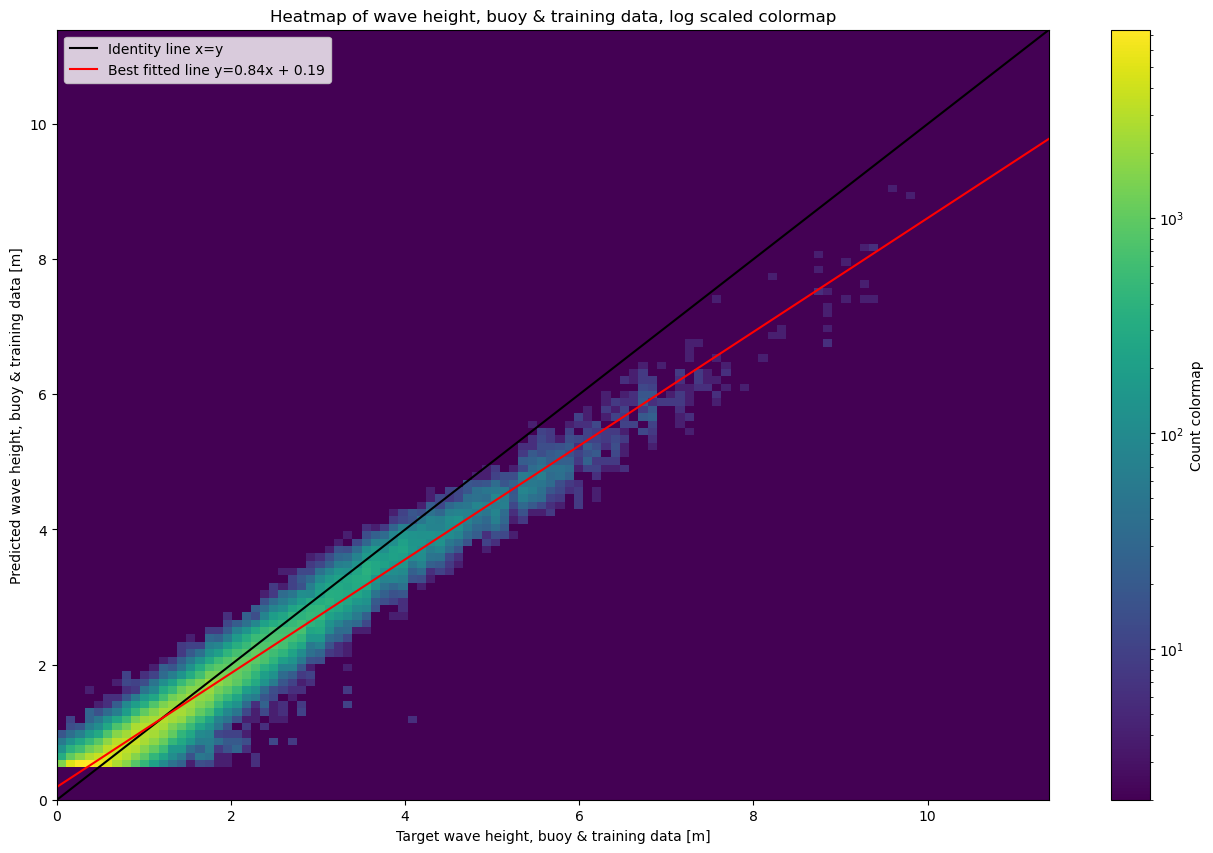

In [475]:
print("Wave height evaluated on training data from buoy data")

wave_mask = train_result_merged['SWH_source'] == 'bouy'
wave_buoy_result_df = train_result_merged[wave_mask][['target_wave', 'prediction_wave']]
#scatterplot_and_heatmaps(wave_buoy_result_df, "wave height, buoy & training data", "m", "target_wave", "prediction_wave")
print(pm.metrics(wave_buoy_result_df, "target_wave", "prediction_wave"))
pm.heatmap(wave_buoy_result_df, "wave height, buoy & training data", "m", "target_wave", "prediction_wave", best_line=True)

Wave height evaluated on training data from model data
{'rmse': 0.29347406579580265, 'bias': -0.04846218714720512, 'slope': 0.8474009161244745, 'data_points': 26942}


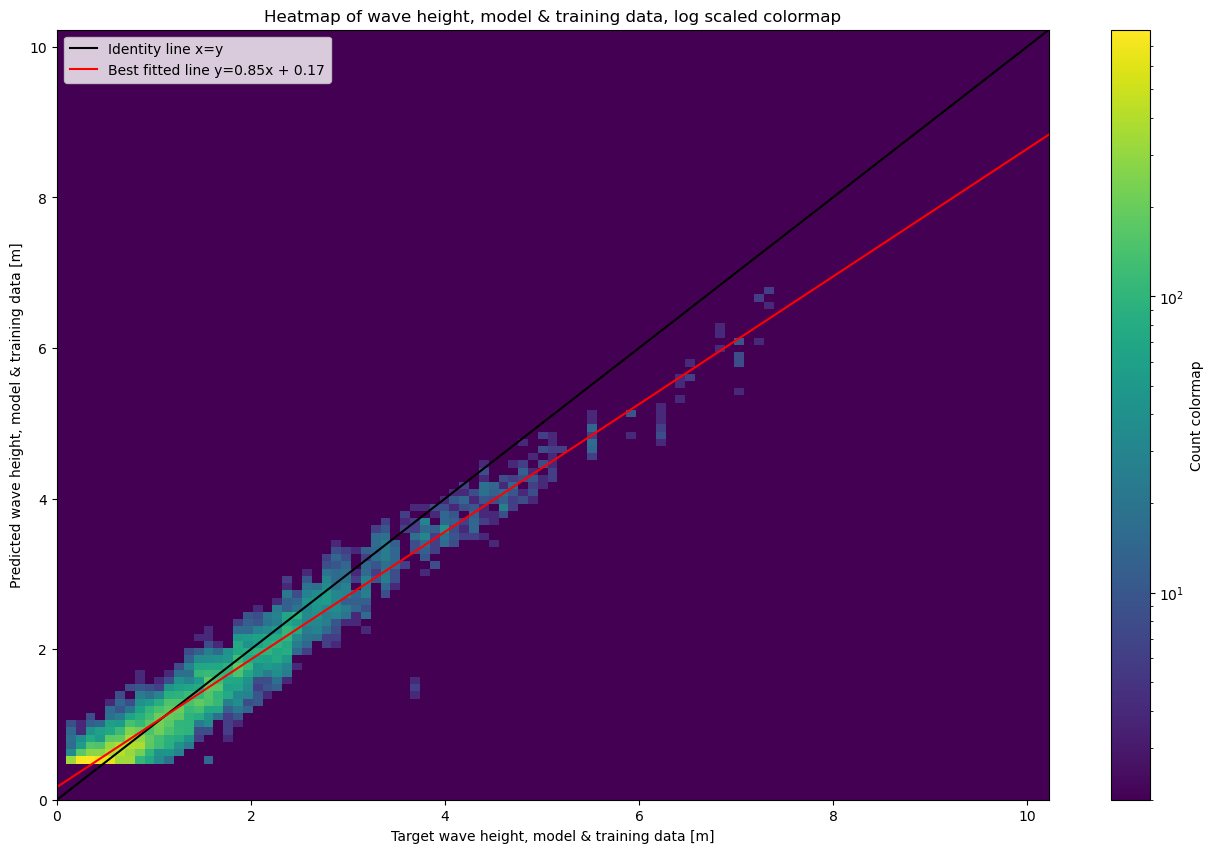

In [476]:
print("Wave height evaluated on training data from model data")

wave_mask = train_result_merged['SWH_source'] == 'model'
wave_buoy_result_df = train_result_merged[wave_mask][['target_wave', 'prediction_wave']]
#scatterplot_and_heatmaps(wave_buoy_result_df, "wave height, model & training data", "m", "target_wave", "prediction_wave")
print(pm.metrics(wave_buoy_result_df, "target_wave", "prediction_wave"))
pm.heatmap(wave_buoy_result_df, "wave height, model & training data", "m", "target_wave", "prediction_wave", best_line=True)

## Wind speed

Wind speed evaluated on training data from both buoy and model data
{'rmse': 1.1998571515696261, 'bias': -0.2527615765369621, 'slope': 0.8341099661939732, 'data_points': 314458}


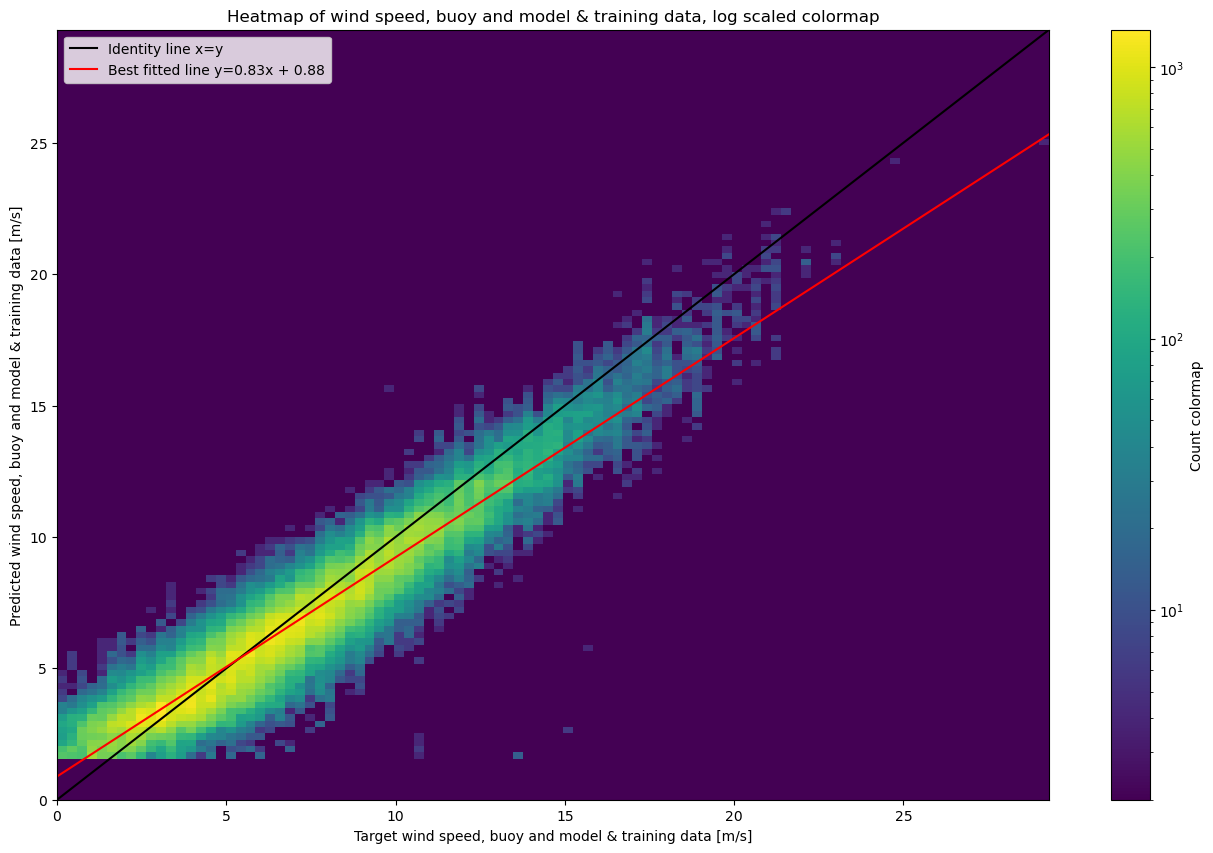

In [477]:
print("Wind speed evaluated on training data from both buoy and model data")

print(pm.metrics(train_result_merged, 'target_wind', 'prediction_wind'))
pm.heatmap(train_result_merged, "wind speed, buoy and model & training data", "m/s", "target_wind", "prediction_wind", best_line=True)

Wind speed evaluated on training data from buoy data
{'rmse': 1.1866281043553488, 'bias': -0.30822003177122625, 'slope': 0.8385211520180603, 'data_points': 138932}


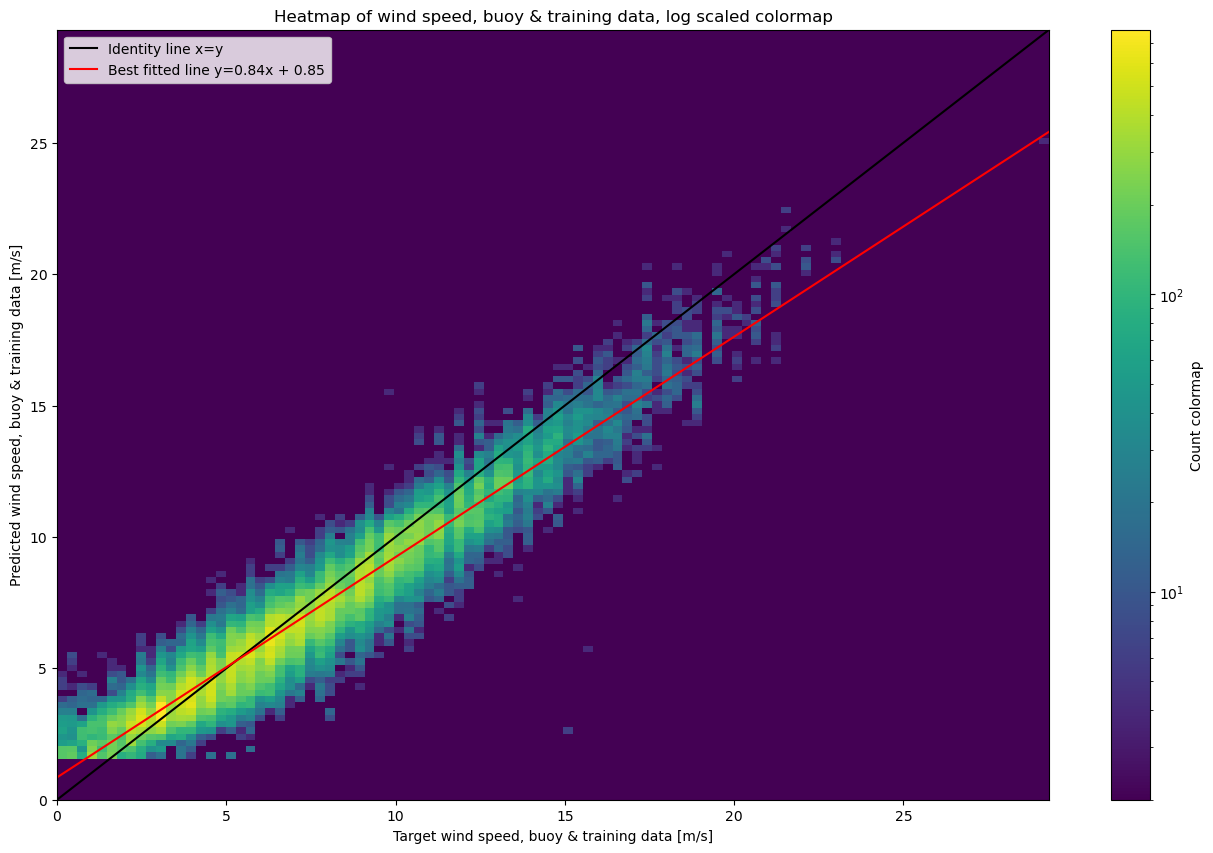

In [478]:
print("Wind speed evaluated on training data from buoy data")
wind_mask = train_result_merged['WSPD_source'] == 'bouy'
wind_buoy_result_df = train_result_merged[wind_mask][['target_wind', 'prediction_wind']]
#scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed, buoy & training data", "m/s", "target_wind", "prediction_wind")

print(pm.metrics(wind_buoy_result_df, 'target_wind', 'prediction_wind'))
pm.heatmap(wind_buoy_result_df, "wind speed, buoy & training data", "m/s", "target_wind", "prediction_wind", best_line=True)

Wind speed evaluated on training data from model data
{'rmse': 1.2102256576990154, 'bias': -0.20886520732324554, 'slope': 0.8297358754685591, 'data_points': 175526}


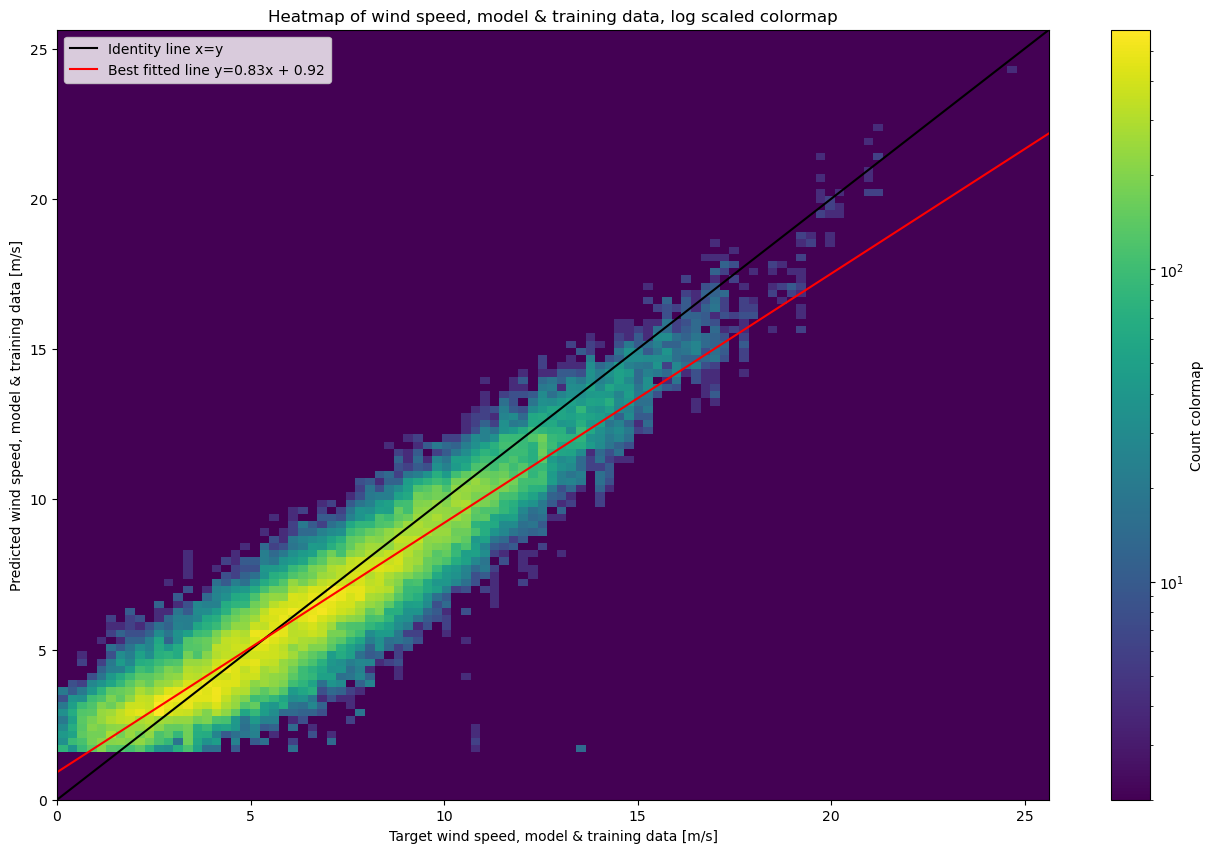

In [479]:
print("Wind speed evaluated on training data from model data")

wind_mask = train_result_merged['WSPD_source'] == 'model'
wind_model_result_df = train_result_merged[wind_mask][['target_wind', 'prediction_wind']]
#scatterplot_and_heatmaps(wind_model_result_df, "wind speed, model & training data", "m/s", "target_wind", "prediction_wind")
print(pm.metrics(wind_model_result_df, 'target_wind', 'prediction_wind'))
pm.heatmap(wind_model_result_df, "wind speed, model & training data", "m/s", "target_wind", "prediction_wind", best_line=True)

# Validation results

## Wave height

In [480]:
wave_mask = val_result_df['target_wave'] != -1
wave_buoy_result_df = val_result_df[wave_mask][['target_wave', 'prediction_wave']]
#display('wave_buoy_result_df', wave_buoy_result_df)

Wave height evaluated on validation data from buoy
{'rmse': 0.46076301232810246, 'bias': -0.0500783334218601, 'slope': 0.762621000971906, 'data_points': 47191}


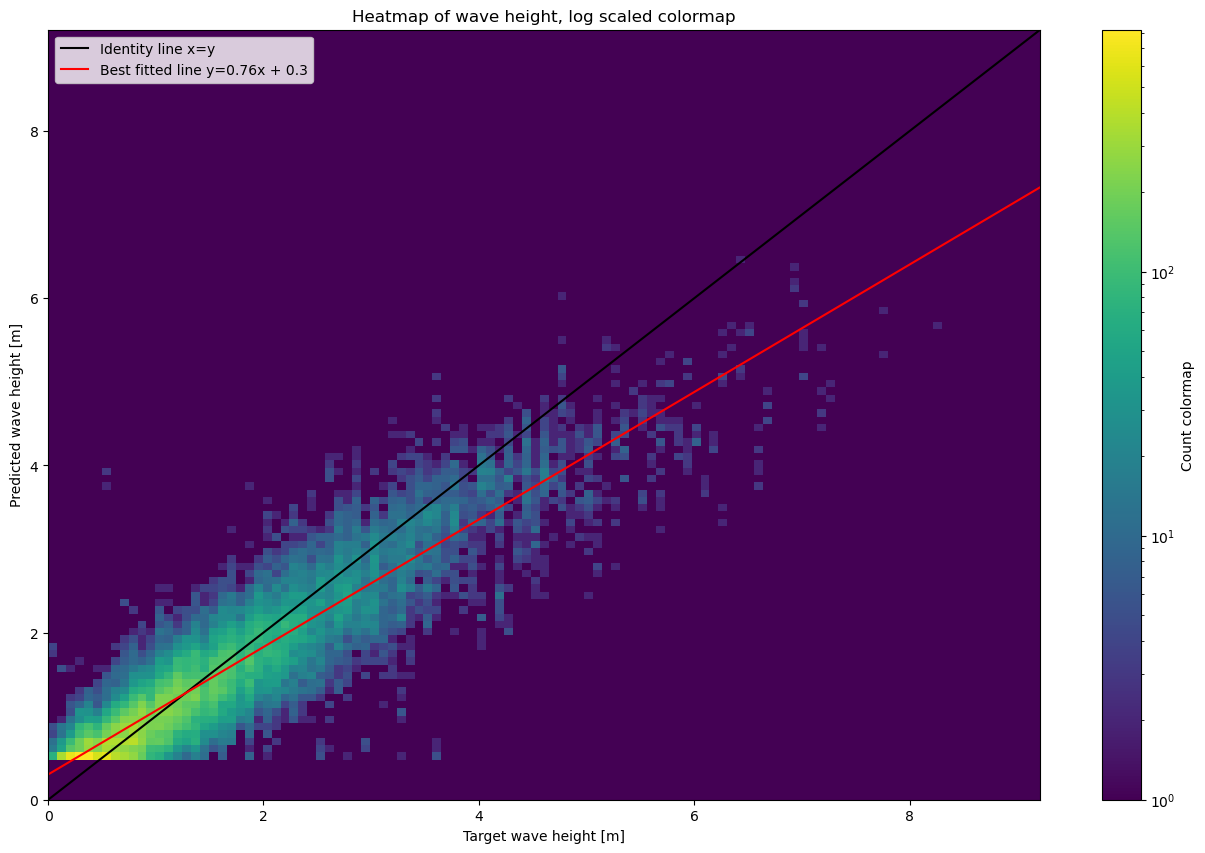

In [481]:
print("Wave height evaluated on validation data from buoy")

#scatterplot_and_heatmaps(wave_buoy_result_df, "wave height", "m", "target_wave", "prediction_wave")
print(pm.metrics(wave_buoy_result_df, "target_wave", "prediction_wave"))
pm.heatmap(wave_buoy_result_df, "wave height", "m", "target_wave", "prediction_wave", best_line=True)

In [482]:
wave_mask = val_result_df['target_wave'] == -1
wave_model_val_result_df = val_result_df[wave_mask][['file_name', 'target_wave', 'prediction_wave']]

wave_model_val_result_merged = wave_model_val_result_df.merge(feature_labels[['file_name', 'SWH_source', 'SWH_value']], on='file_name', how='left')
display(wave_model_val_result_merged)

,file_name,target_wave,prediction_wave,SWH_source,SWH_value
0,S1A_IW_GRDH_1SDV_20210105T174246_20210105T1743...,-1.0,1.895480,model,1.612926
1,S1A_IW_GRDH_1SDV_20210105T174246_20210105T1743...,-1.0,1.895480,model,1.612926
2,S1A_IW_GRDH_1SDV_20210105T174246_20210105T1743...,-1.0,1.682013,model,1.612926
3,S1A_IW_GRDH_1SDV_20210105T174246_20210105T1743...,-1.0,1.682013,model,1.612926
4,S1A_IW_GRDH_1SDV_20210105T174246_20210105T1743...,-1.0,1.867562,model,1.612926
...,...,...,...,...,...
8883,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,0.575191,model,0.997581
8884,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,0.651985,model,0.997581
8885,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,0.651985,model,0.997581
8886,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,0.564337,model,0.997581


Wave height evaluated on validation data from model
{'rmse': 0.42346728332167005, 'bias': -0.07002141186565229, 'slope': 0.7541903625661887, 'data_points': 8888}


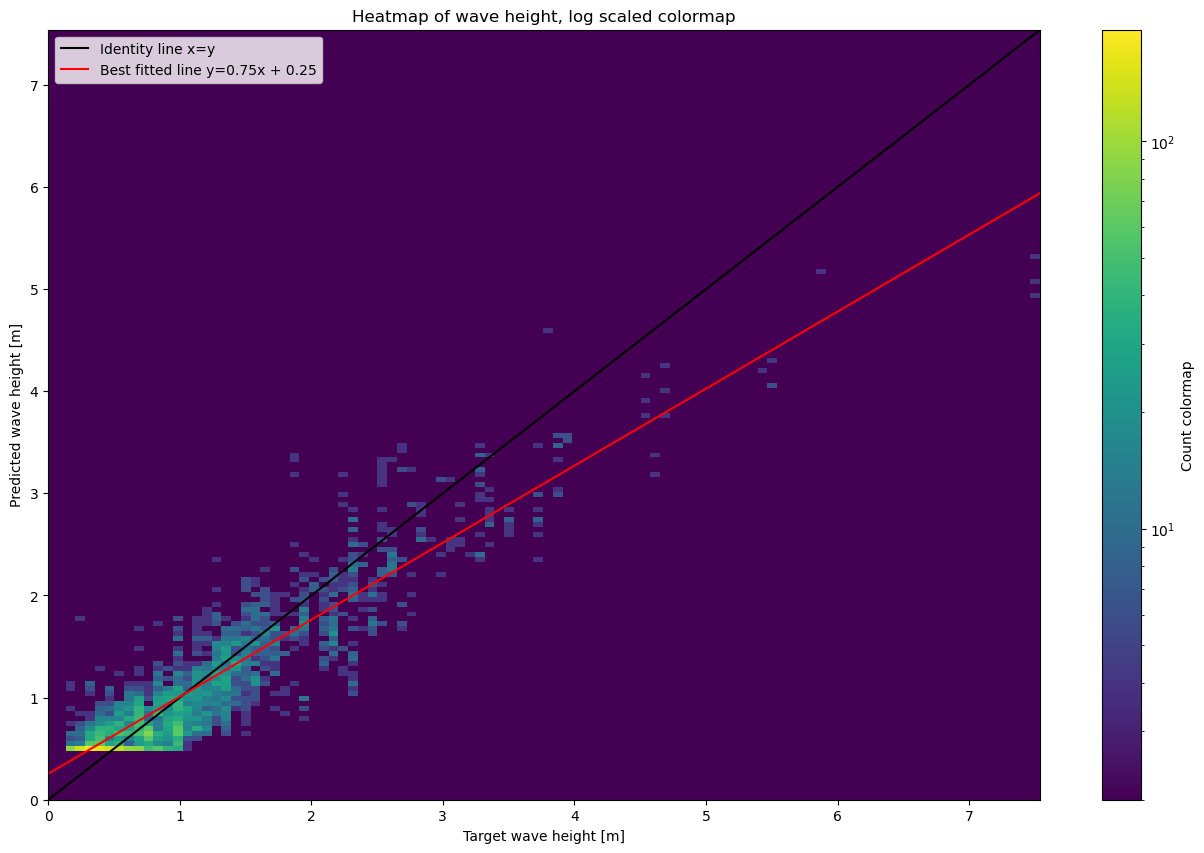

In [483]:
print("Wave height evaluated on validation data from model")

#scatterplot_and_heatmaps(wave_buoy_result_df, "wave height", "m", "target_wave", "prediction_wave")
print(pm.metrics(wave_model_val_result_merged, "SWH_value", "prediction_wave"))
pm.heatmap(wave_model_val_result_merged, "wave height", "m", "SWH_value", "prediction_wave", best_line=True)

## Wind speed

In [484]:
wind_mask = val_result_df['target_wind'] != -1
wind_buoy_result_df = val_result_df[wind_mask][['target_wind', 'prediction_wind']]
#display('wind_buoy_result_df', wind_buoy_result_df)

Wind speed evaluated on validation data from buoy
{'rmse': 1.6691051140306021, 'bias': -0.38724383133383844, 'slope': 0.7565862721948561, 'data_points': 22439}


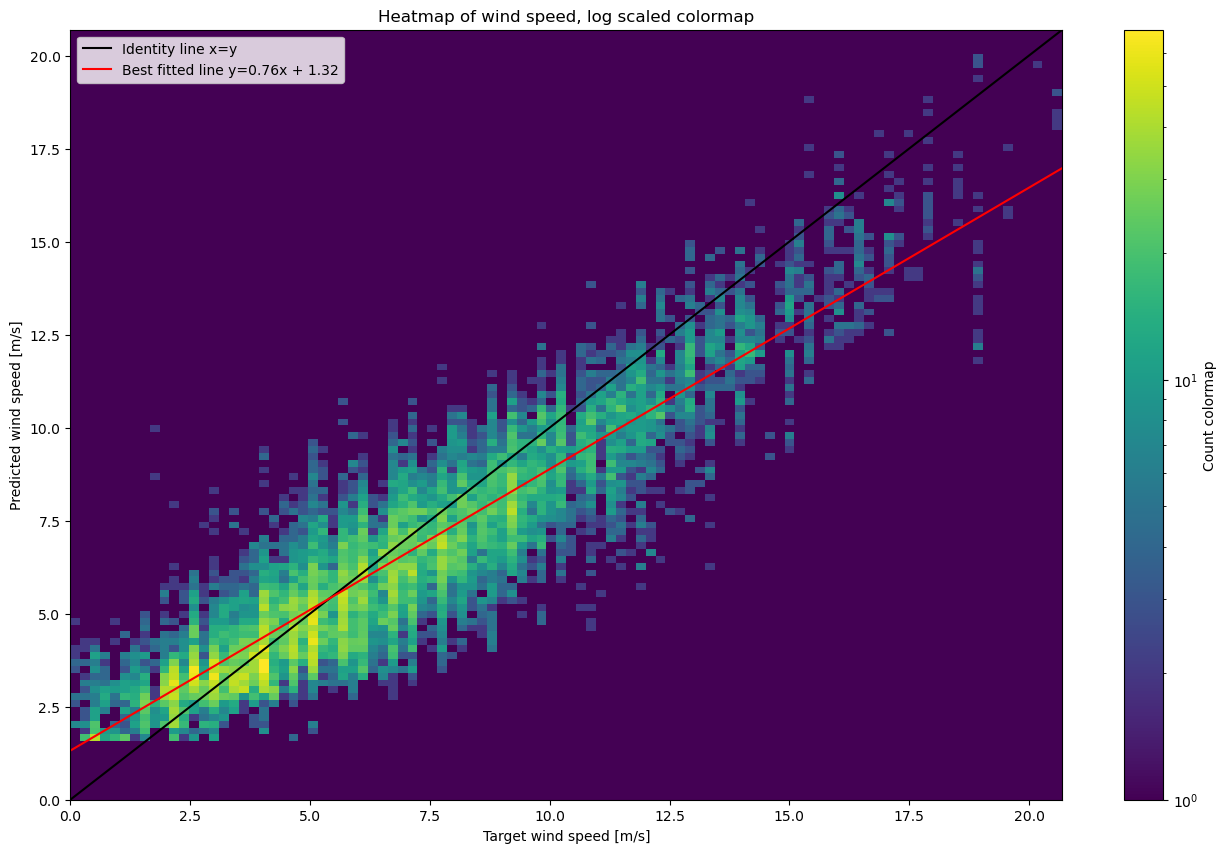

In [485]:
print("Wind speed evaluated on validation data from buoy")

#scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed", "m/s", "target_wind", "prediction_wind")
print(pm.metrics(wind_buoy_result_df, "target_wind", "prediction_wind"))
pm.heatmap(wind_buoy_result_df, "wind speed", "m/s", "target_wind", "prediction_wind", best_line=True)

In [486]:
wind_mask = val_result_df['target_wind'] == -1
wind_model_val_result_df = val_result_df[wind_mask][['file_name', 'target_wind', 'prediction_wind']]

wind_model_val_result_merged = wind_model_val_result_df.merge(feature_labels[['file_name', 'WSPD_source', 'WSPD_value']], on='file_name', how='left')
display(wind_model_val_result_merged)

,file_name,target_wind,prediction_wind,WSPD_source,WSPD_value
0,S1A_IW_GRDH_1SDV_20210101T134450_20210101T1345...,-1.0,8.725609,model,1.567395
1,S1A_IW_GRDH_1SDV_20210101T134450_20210101T1345...,-1.0,8.725609,model,1.567395
2,S1A_IW_GRDH_1SDV_20210101T134450_20210101T1345...,-1.0,8.486736,model,1.567395
3,S1A_IW_GRDH_1SDV_20210101T134450_20210101T1345...,-1.0,8.486736,model,1.567395
4,S1A_IW_GRDH_1SDV_20210101T134450_20210101T1345...,-1.0,8.382136,model,1.567395
...,...,...,...,...,...
58387,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,8.140516,model,10.172038
58388,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,8.735297,model,10.172038
58389,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,8.735297,model,10.172038
58390,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,8.602242,model,10.172038


Wind speed evaluated on validation data from model
{'rmse': 1.900383497240401, 'bias': -0.156549042745732, 'slope': 0.7345425976756884, 'data_points': 58392}


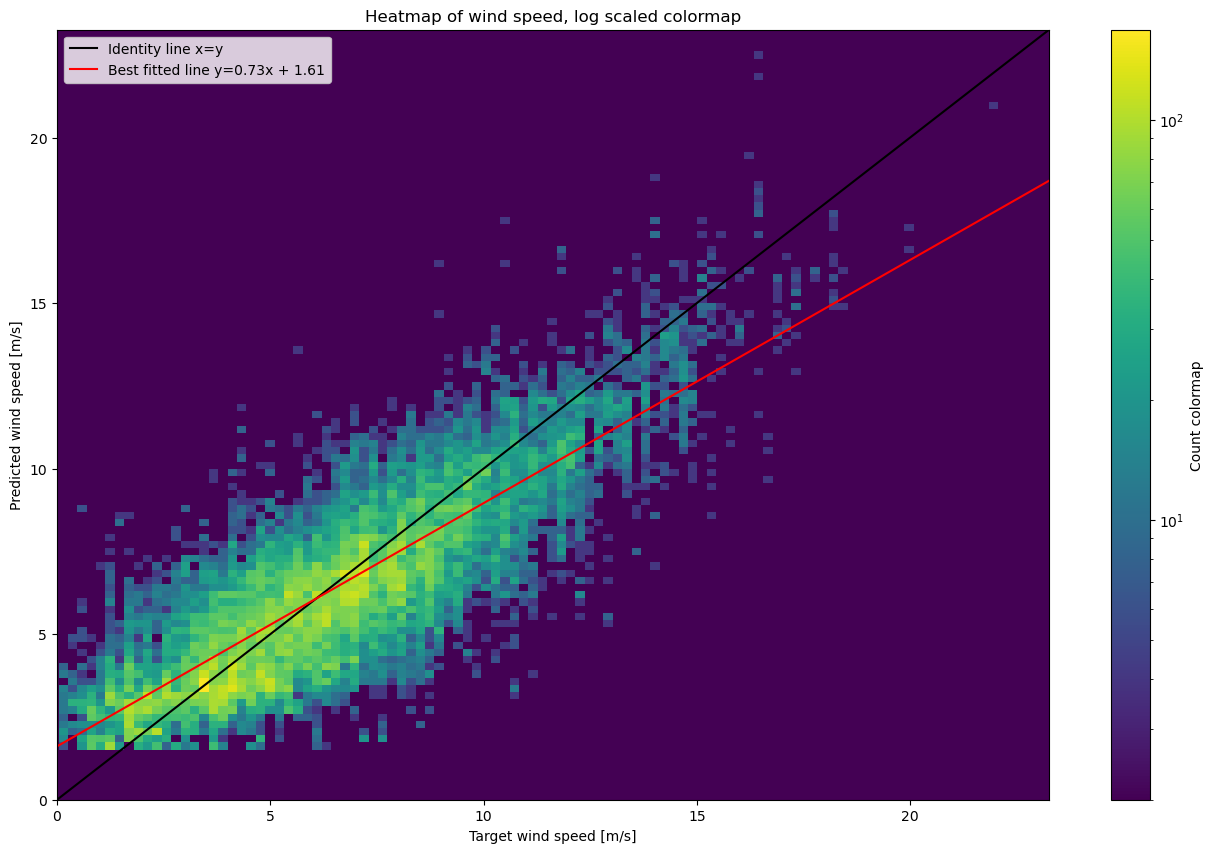

In [487]:
print("Wind speed evaluated on validation data from model")

#scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed", "m/s", "target_wind", "prediction_wind")
print(pm.metrics(wind_model_val_result_merged, "WSPD_value", "prediction_wind"))
pm.heatmap(wind_model_val_result_merged, "wind speed", "m/s", "WSPD_value", "prediction_wind", best_line=True)

# Test results

## Wave height

In [488]:
wave_mask = test_result_df['target_wave'] != -1
wave_buoy_result_df = test_result_df[wave_mask][['target_wave', 'prediction_wave']]

Wave height evaluated on test data from buoy
{'rmse': 0.4586034666829373, 'bias': -0.045922915585718475, 'slope': 0.7489085335869758, 'data_points': 47796}


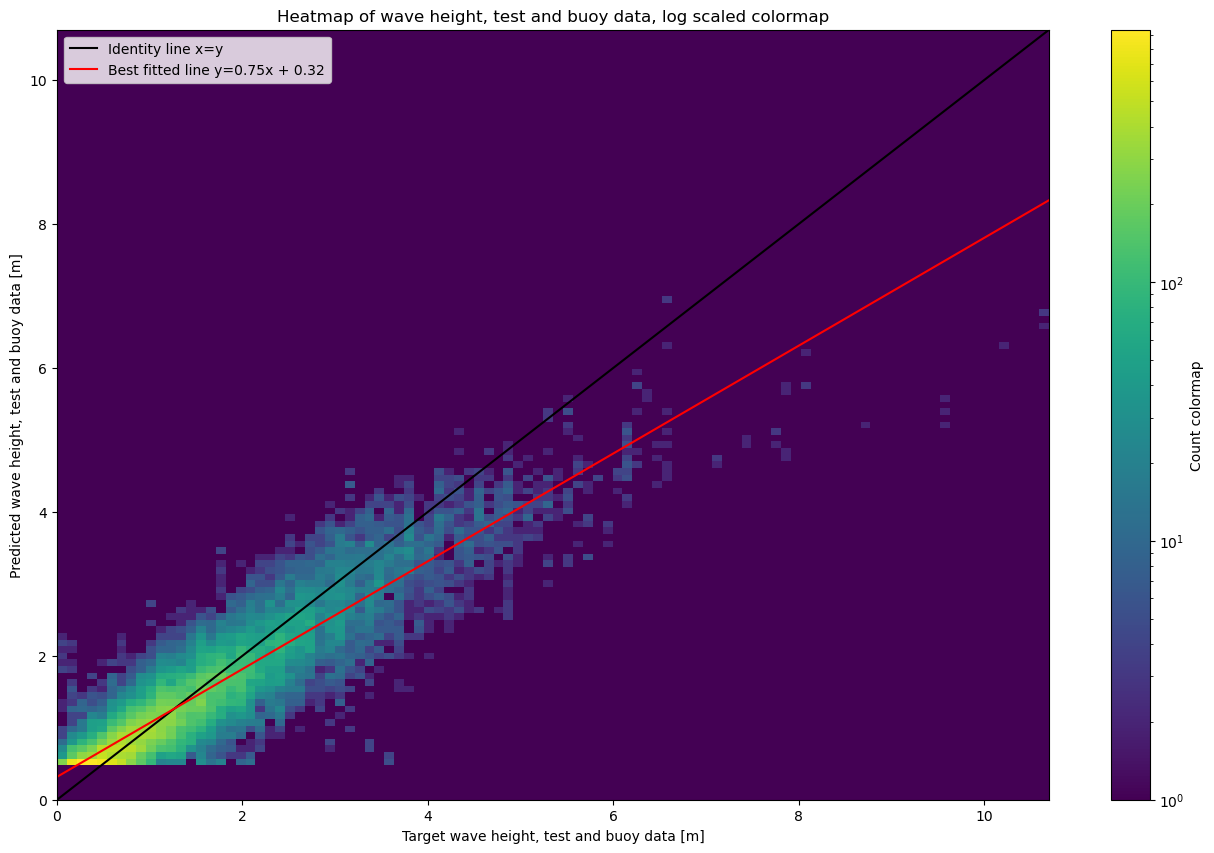

In [489]:
print("Wave height evaluated on test data from buoy")

print(pm.metrics(wave_buoy_result_df, "target_wave", "prediction_wave"))
pm.heatmap(wave_buoy_result_df, "wave height, test and buoy data", "m", "target_wave", "prediction_wave", best_line=True)

In [490]:
wave_mask = test_result_df['target_wave'] == -1
wave_model_test_result_df = test_result_df[wave_mask][['file_name', 'target_wave', 'prediction_wave']]

wave_model_test_result_merged = wave_model_test_result_df.merge(feature_labels[['file_name', 'SWH_source', 'SWH_value']], on='file_name', how='left')
display(wave_model_test_result_merged)

,file_name,target_wave,prediction_wave,SWH_source,SWH_value
0,S1A_IW_GRDH_1SDV_20210105T092315_20210105T0923...,-1.0,0.524563,model,0.947143
1,S1A_IW_GRDH_1SDV_20210105T092315_20210105T0923...,-1.0,0.524563,model,0.947143
2,S1A_IW_GRDH_1SDV_20210105T092315_20210105T0923...,-1.0,0.926770,model,0.947143
3,S1A_IW_GRDH_1SDV_20210105T092315_20210105T0923...,-1.0,0.926770,model,0.947143
4,S1A_IW_GRDH_1SDV_20210105T092315_20210105T0923...,-1.0,0.589214,model,0.947143
...,...,...,...,...,...
9141,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,1.169244,model,1.083750
9142,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,1.384142,model,1.083750
9143,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,1.384142,model,1.083750
9144,S1B_IW_GRDH_1SDV_20211222T171709_20211222T1717...,-1.0,0.926047,model,1.083750


Wave height evaluated on test data from model
{'rmse': 0.48182657849705063, 'bias': -0.11881667786800157, 'slope': 0.751210129303615, 'data_points': 9146}


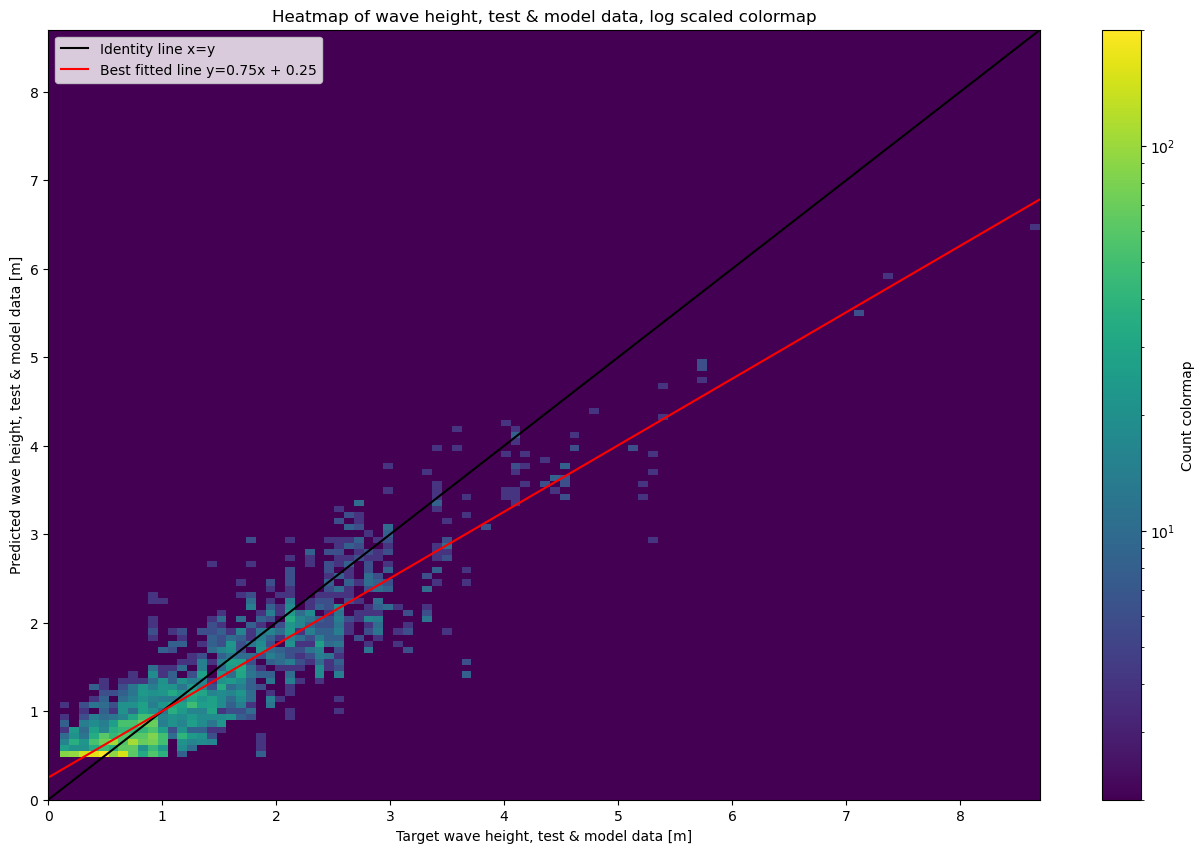

In [491]:
print("Wave height evaluated on test data from model")

print(pm.metrics(wave_model_test_result_merged, "SWH_value", "prediction_wave"))
pm.heatmap(wave_model_test_result_merged, "wave height, test & model data", "m", "SWH_value", "prediction_wave", best_line=True)

## Wind speed

In [492]:
wind_mask = test_result_df['target_wind'] != -1
wind_buoy_result_df = test_result_df[wind_mask][['target_wind', 'prediction_wind']]

Wind speed evaluated on test data from buoy
{'rmse': 1.65778060651853, 'bias': -0.42510665283150334, 'slope': 0.7673733679003557, 'data_points': 22677}


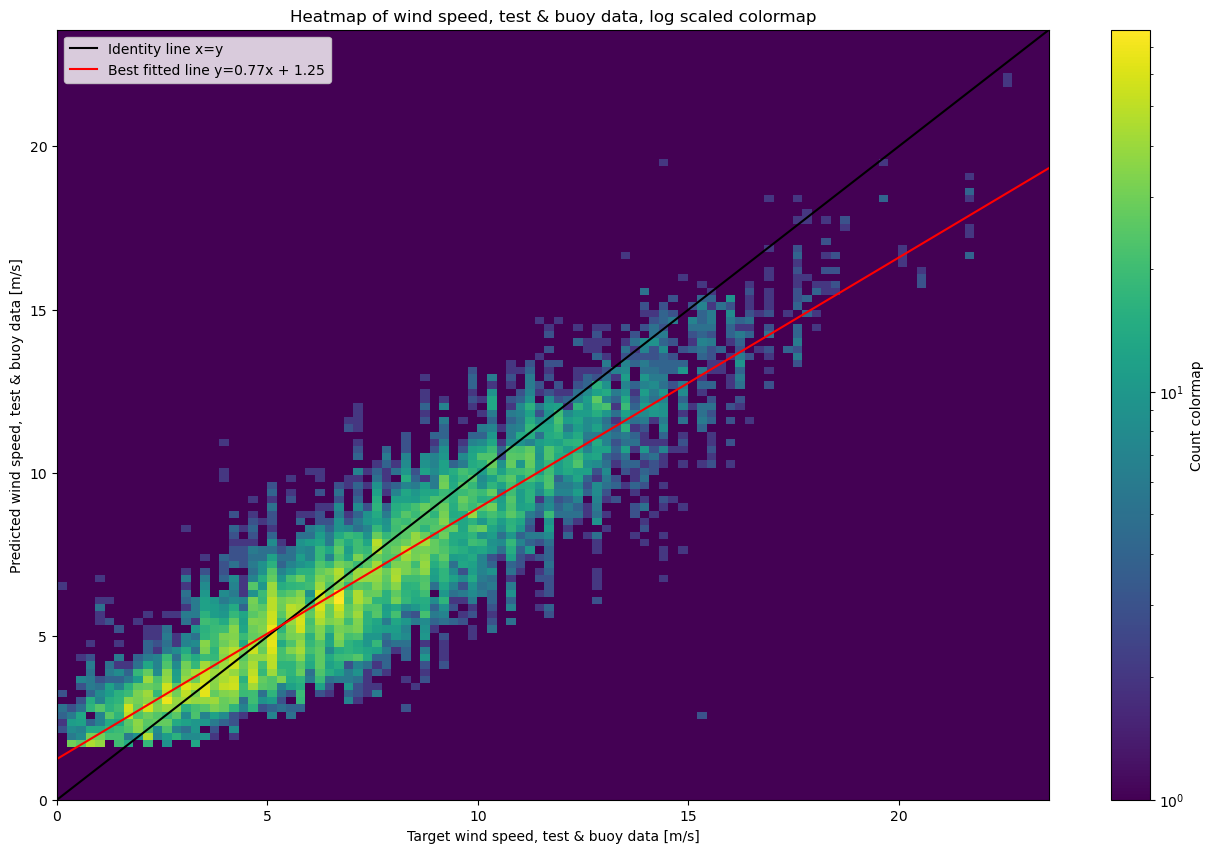

In [493]:
print("Wind speed evaluated on test data from buoy")

#scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed", "m/s", "target_wind", "prediction_wind")
print(pm.metrics(wind_buoy_result_df, "target_wind", "prediction_wind"))
pm.heatmap(wind_buoy_result_df, "wind speed, test & buoy data", "m/s", "target_wind", "prediction_wind", best_line=True)

In [494]:
wind_mask = test_result_df['target_wind'] == -1
wind_model_test_result_df = test_result_df[wind_mask][['file_name', 'target_wind', 'prediction_wind']]

wind_model_test_result_merged = wind_model_test_result_df.merge(feature_labels[['file_name', 'WSPD_source', 'WSPD_value']], on='file_name', how='left')
display(wind_model_test_result_merged)

,file_name,target_wind,prediction_wind,WSPD_source,WSPD_value
0,S1A_IW_GRDH_1SDV_20210101T194927_20210101T1949...,-1.0,7.777683,model,11.477427
1,S1A_IW_GRDH_1SDV_20210101T194927_20210101T1949...,-1.0,7.777683,model,11.477427
2,S1A_IW_GRDH_1SDV_20210101T194927_20210101T1949...,-1.0,3.894054,model,11.477427
3,S1A_IW_GRDH_1SDV_20210101T194927_20210101T1949...,-1.0,3.894054,model,11.477427
4,S1A_IW_GRDH_1SDV_20210101T213040_20210101T2131...,-1.0,13.711407,model,15.189617
...,...,...,...,...,...
59379,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,8.890350,model,8.702504
59380,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,9.879619,model,8.702504
59381,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,9.879619,model,8.702504
59382,S1B_IW_GRDH_1SDV_20211223T043859_20211223T0439...,-1.0,9.290893,model,8.702504


Wind speed evaluated on test data from model
{'rmse': 1.8661004297109016, 'bias': -0.17139215157569687, 'slope': 0.7375389103963655, 'data_points': 59384}


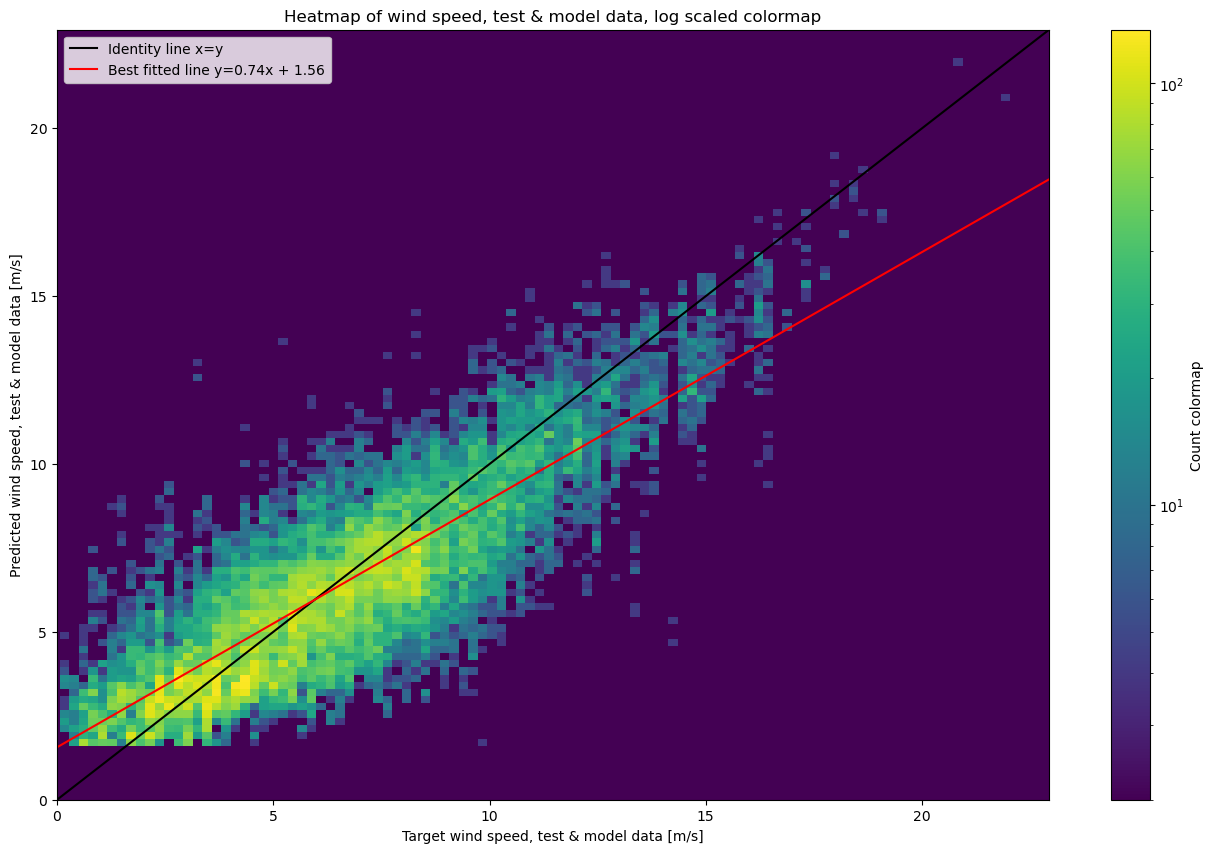

In [495]:
print("Wind speed evaluated on test data from model")

print(pm.metrics(wind_model_test_result_merged, "WSPD_value", "prediction_wind"))
pm.heatmap(wind_model_test_result_merged, "wind speed, test & model data", "m/s", "WSPD_value", "prediction_wind", best_line=True)